In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import font_manager
import seaborn as sns

In [2]:
# Font
font_location = '/Library/Fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [6]:
# Read csv

# encoding cp949
data = pd.read_csv('./temp/fire.csv', encoding='cp949' , sep=',')
data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,23707,산업시설,공장시설,제재 및 목공업
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",건초,0,0,0,3542,산업시설,동식물시설,기타 동식물시설
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,튀김유,0,0,0,0,"판매,업무시설",일반업무,오피스텔
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",0,0,0,105,"판매,업무시설",판매시설,할인점(마트)


In [7]:
# 년-월-일 표기
data['onlyDay'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m-%d')
# 년-월 표기
data['onlyMonth'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m')

In [8]:
data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류,onlyDay,onlyMonth
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외,2019-01-01,2019-01
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택,2019-01-01,2019-01
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차,2019-01-01,2019-01
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장,2019-01-01,2019-01
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물,2019-01-01,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,23707,산업시설,공장시설,제재 및 목공업,2019-12-31,2019-12
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",건초,0,0,0,3542,산업시설,동식물시설,기타 동식물시설,2019-12-31,2019-12
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,튀김유,0,0,0,0,"판매,업무시설",일반업무,오피스텔,2019-12-31,2019-12
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",0,0,0,105,"판매,업무시설",판매시설,할인점(마트),2019-12-31,2019-12


In [9]:
# 달별 합계
a = data.groupby(data['onlyMonth']).sum()
# 화재 발생 회수 카운트
b= data['화재발생년월일'].groupby(data['onlyMonth']).count()

In [10]:
a

,인명피해(명)소계,사망,부상,재산피해소계
onlyMonth,,,,
2019-01,271,35,236,68982834
2019-02,199,38,161,32421577
2019-03,269,29,240,54794839
2019-04,180,30,150,233563051
2019-05,222,24,198,88526946
2019-06,151,12,139,35390200
2019-07,195,15,180,28860167
2019-08,197,21,176,46624356
2019-09,230,21,209,154883440


In [11]:
b.to_frame()

,화재발생년월일
onlyMonth,
2019-01,4430
2019-02,3413
2019-03,4267
2019-04,3611
2019-05,3990
2019-06,2862
2019-07,2956
2019-08,2888
2019-09,2703


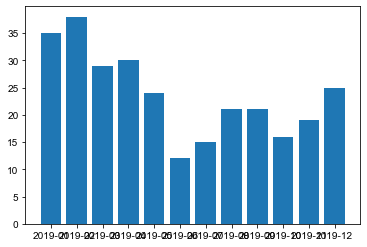

In [12]:
# 월 별 사망 사고 비율
ax1 = plt.subplot(111)
graph1 = plt.bar(a.index, a['사망'])

In [13]:
data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류,onlyDay,onlyMonth
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외,2019-01-01,2019-01
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택,2019-01-01,2019-01
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차,2019-01-01,2019-01
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장,2019-01-01,2019-01
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물,2019-01-01,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,23707,산업시설,공장시설,제재 및 목공업,2019-12-31,2019-12
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",건초,0,0,0,3542,산업시설,동식물시설,기타 동식물시설,2019-12-31,2019-12
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,튀김유,0,0,0,0,"판매,업무시설",일반업무,오피스텔,2019-12-31,2019-12
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",0,0,0,105,"판매,업무시설",판매시설,할인점(마트),2019-12-31,2019-12


In [14]:
c = data.groupby(data['화재유형']).sum()
c['count'] = data['화재유형'].groupby(data['화재유형']).count()
c['건당피해'] = c['재산피해소계']/c['count']
d = c.sort_values('건당피해', ascending=False)
c

,인명피해(명)소계,사망,부상,재산피해소계,count,건당피해
화재유형,,,,,,
"건축,구조물",1993,216,1777,552840022,26025,21242.652142
기타(쓰레기 화재등),166,9,157,7633013,7020,1087.323789
"선박,항공기",27,1,26,60005851,108,555609.731481
"위험물,가스제조소등",19,1,18,6805927,29,234687.137931
임야,133,17,116,198547953,2211,89800.069199
"자동차,철도차량",177,41,136,32663468,4710,6934.918896


Text(0, 0.5, '')

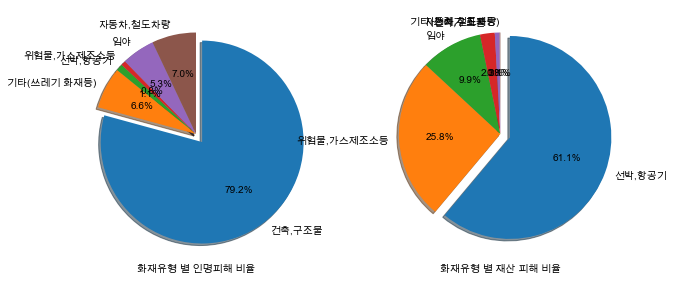

In [15]:
fig1= plt.figure()
explode_value = (0.1, 0, 0, 0, 0, 0)
ax2 = fig1.add_subplot(121)
firepie = c['인명피해(명)소계'].plot.pie(figsize=(10,10), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax2)
firepie.set_xlabel("화재유형 별 인명피해 비율")
firepie.set_ylabel("")

ax3 = fig1.add_subplot(122)
damagepie = d['건당피해'].plot.pie(figsize=(10,10), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax3)
damagepie.set_xlabel("화재유형 별 재산 피해 비율")
damagepie.set_ylabel("")


# Heatmap

In [16]:
df = pd.DataFrame()

In [17]:
df

""


In [18]:
data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류,onlyDay,onlyMonth
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외,2019-01-01,2019-01
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택,2019-01-01,2019-01
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차,2019-01-01,2019-01
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장,2019-01-01,2019-01
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물,2019-01-01,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,23707,산업시설,공장시설,제재 및 목공업,2019-12-31,2019-12
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",건초,0,0,0,3542,산업시설,동식물시설,기타 동식물시설,2019-12-31,2019-12
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,튀김유,0,0,0,0,"판매,업무시설",일반업무,오피스텔,2019-12-31,2019-12
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",0,0,0,105,"판매,업무시설",판매시설,할인점(마트),2019-12-31,2019-12


In [19]:
data['month'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%m월')

In [20]:
data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,...,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류,onlyDay,onlyMonth,month
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등",...,1,0,1,0,기타,야외,기타야외,2019-01-01,2019-01,01월
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,...,0,0,0,14900,주거,단독주택,단독주택,2019-01-01,2019-01,01월
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,...,0,0,0,3642,"자동차,철도차량",자동차,승용자동차,2019-01-01,2019-01,01월
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등",...,0,0,0,1848,기타,야외,야적장,2019-01-01,2019-01,01월
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자",...,0,0,0,45,기타서비스,기타건축물,기타 건축물,2019-01-01,2019-01,01월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",...,0,0,0,23707,산업시설,공장시설,제재 및 목공업,2019-12-31,2019-12,12월
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",...,0,0,0,3542,산업시설,동식물시설,기타 동식물시설,2019-12-31,2019-12,12월
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,...,0,0,0,0,"판매,업무시설",일반업무,오피스텔,2019-12-31,2019-12,12월
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,...,0,0,0,105,"판매,업무시설",판매시설,할인점(마트),2019-12-31,2019-12,12월


In [21]:
data['화재유형'].to_frame()

,화재유형
0,기타(쓰레기 화재등)
1,"건축,구조물"
2,"자동차,철도차량"
3,기타(쓰레기 화재등)
4,"건축,구조물"
...,...
40098,"건축,구조물"
40099,"건축,구조물"
40100,"건축,구조물"
40101,"건축,구조물"


In [22]:
# 중복된 데이터 제거하기
delDup = data.drop_duplicates('화재유형',keep='first') # 화재 유형 중복 제거
delMonth= data.drop_duplicates('month', keep='first') # 월 중복 제거

In [23]:
delMonth['month'].to_frame()

,month
0,01월
4430,02월
7843,03월
12110,04월
15721,05월
19711,06월
22573,07월
25529,08월
28417,09월
31120,10월


In [24]:
df = pd.DataFrame(index=delDup['화재유형'])

In [25]:
for i in delMonth['month']:
    month = data.month == i
    df_firePerMonth = data.loc[month,:]
    dfTemp=df_firePerMonth['화재유형'].groupby(df_firePerMonth['화재유형']).count().to_frame()
    dfTemp = dfTemp.rename(columns={'화재유형':i})
    df = df.join(dfTemp)

In [26]:
df

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
화재유형,,,,,,,,,,,,
기타(쓰레기 화재등),847,593,901,671,898,552.0,433,433,380,416,418,478
"건축,구조물",2828,2205,2399,2168,2325,1824.0,2054,2007,1921,1884,2084,2326
"자동차,철도차량",399,332,399,373,469,378.0,406,416,366,436,374,362
임야,343,274,556,383,288,99.0,53,21,23,52,56,63
"선박,항공기",11,8,10,11,9,9.0,8,8,5,6,16,7
"위험물,가스제조소등",2,1,2,5,1,NaN,2,3,8,3,1,1


In [27]:
df['tot'] = df.sum(axis=1)

## 화재 유형 별 월별 발생량

In [32]:
df

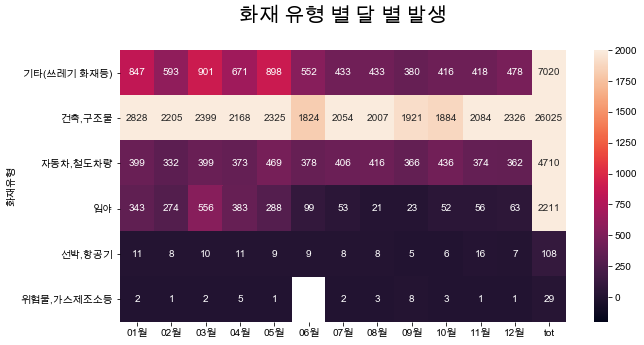

In [34]:
sns.heatmap(df, annot=True,vmin=-200,vmax=2000, fmt='.0f')

plt.title('화재 유형 별 달 별 발생\n', fontsize=20)

plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [35]:
df

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,tot
화재유형,,,,,,,,,,,,,
기타(쓰레기 화재등),847.0,593.0,901.0,671.0,898.0,552.0,433.0,433.0,380.0,416.0,418.0,478.0,7020.0
"건축,구조물",2828.0,2205.0,2399.0,2168.0,2325.0,1824.0,2054.0,2007.0,1921.0,1884.0,2084.0,2326.0,26025.0
"자동차,철도차량",399.0,332.0,399.0,373.0,469.0,378.0,406.0,416.0,366.0,436.0,374.0,362.0,4710.0
임야,343.0,274.0,556.0,383.0,288.0,99.0,53.0,21.0,23.0,52.0,56.0,63.0,2211.0
"선박,항공기",11.0,8.0,10.0,11.0,9.0,9.0,8.0,8.0,5.0,6.0,16.0,7.0,108.0
"위험물,가스제조소등",2.0,1.0,2.0,5.0,1.0,NaN,2.0,3.0,8.0,3.0,1.0,1.0,29.0


In [36]:
df=df.drop(['tot'],axis=1)

# Test

In [37]:
delMonth

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,...,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류,onlyDay,onlyMonth,month
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등",...,1,0,1,0,기타,야외,기타야외,2019-01-01,2019-01,01월
4430,2019-02-01 00:14,서울특별시,영등포구,영등포동2가,"건축,구조물",미상,미상,미상,미상,미상,...,0,0,0,4590,"판매,업무시설",일반업무,공사,2019-02-01,2019-02,02월
7843,2019-03-01 00:23,경기도,용인시처인구,김량장동,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",...,0,0,0,230,생활서비스,오락시설,노래연습장,2019-03-01,2019-03,03월
12110,2019-04-01 00:13,경기도,김포시,양촌읍,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,기타(전기적요인),"전기,전자",...,0,0,0,2459,산업시설,공장시설,금속기계 및 기구공업,2019-04-01,2019-04,04월
15721,2019-05-01 00:48,강원도,홍천군,서석면,"건축,구조물",작동기기,"기기 전도,복사열",기계적 요인,"과열, 과부하","종이,목재,건초등",...,0,0,0,48143,주거,단독주택,단독주택,2019-05-01,2019-05,05월
19711,2019-06-01 00:09,대전광역시,중구,유천동,"건축,구조물","담뱃불, 라이터불","라이터불, 성냥불",방화의심,방화의심,"종이,목재,건초등",...,0,0,0,563,"판매,업무시설",일반업무,기타 일반업무시설,2019-06-01,2019-06,06월
22573,2019-07-01 00:01,서울특별시,서대문구,북가좌동,기타(쓰레기 화재등),"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,쓰레기류,...,0,0,0,55,기타,야외,쓰레기,2019-07-01,2019-07,07월
25529,2019-08-01 00:14,경기도,화성시,마도면,"건축,구조물",화학적 발화열,화학반응열,화학적 요인,자연발화,기타,...,0,0,0,1100,기타서비스,기타건축물,기타 건축물,2019-08-01,2019-08,08월
28417,2019-09-01 00:02,대전광역시,동구,낭월동,기타(쓰레기 화재등),"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,"종이,목재,건초등",...,0,0,0,3477,기타,야외,쓰레기,2019-09-01,2019-09,09월
31120,2019-10-01 00:52,경상남도,창원시 성산구,상남동,"건축,구조물",기타,기타,부주의,"불씨,불꽃,화원방치",기타,...,0,0,0,150,"판매,업무시설",판매시설,상가빌딩,2019-10-01,2019-10,10월


In [38]:
for i in delMonth[['month', '사망']]:
    print(i)
#     month = data.month == i
#     df_firePerMonth = data.loc[month,:]
#     dfTemp=df_firePerMonth['화재유형'].groupby(df_firePerMonth['화재유형']).count().to_frame()
#     dfTemp = dfTemp.rename(columns={'화재유형':i})
#     df = df.join(dfTemp)

month
사망


In [39]:
# 월별 프레임 뽑아내고
mask = (data.month == '01월') & (data.발화열원대분류 == '미상')
df = data.loc[mask,:]

In [40]:
df['사망'].sum()

6

In [41]:
df = pd.DataFrame(index=delDup['화재유형'])
df

""
화재유형
기타(쓰레기 화재등)
"건축,구조물"
"자동차,철도차량"
임야
"선박,항공기"
"위험물,가스제조소등"


In [42]:
for j in delDup['화재유형']:
    print(j)

기타(쓰레기 화재등)
건축,구조물
자동차,철도차량
임야
선박,항공기
위험물,가스제조소등


In [43]:
for i in delMonth['month']:
    print(i)

01월
02월
03월
04월
05월
06월
07월
08월
09월
10월
11월
12월


In [47]:
df = pd.DataFrame(index=delDup['화재유형'])
for i in delMonth['month']:
    dfTemp = pd.DataFrame()
    for j in delDup['화재유형']:
        month = (data.month == i) & (data.화재유형 == j)
        df_firePerMonth = data.loc[month,:]
        dfTemp = dfTemp.append(df_firePerMonth['사망'].groupby(df_firePerMonth['화재유형']).sum().to_frame())
    df = df.join(dfTemp)
    df = df.rename(columns={'사망':i})

In [48]:
df

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
화재유형,,,,,,,,,,,,
기타(쓰레기 화재등),3,0,1,0,1,0.0,1,2,1,0,0,0
"건축,구조물",26,30,24,17,20,9.0,12,14,15,13,14,22
"자동차,철도차량",5,6,1,5,2,2.0,2,4,4,3,4,3
임야,1,2,3,8,1,0.0,0,0,1,0,1,0
"선박,항공기",0,0,0,0,0,1.0,0,0,0,0,0,0
"위험물,가스제조소등",0,0,0,0,0,NaN,0,1,0,0,0,0


In [44]:
df = pd.DataFrame()
for i in "01월":
    dfTemp = pd.DataFrame()
    for j in '기타(쓰레기 화재등)':
        month = (data.month == i) & (data.화재유형 == j)
        df_firePerMonth = data.loc[month,:]
        dfTemp = dfTemp.append(df_firePerMonth['사망'].groupby(df_firePerMonth['화재유형']).sum().to_frame())
    df = df.join(dfTemp)
    df = df.rename(columns={'사망':i})

### 여기에서 시작

In [451]:
df = pd.DataFrame(index=delDup['화재유형'])

In [461]:
dfTemp = pd.DataFrame()

In [467]:
month = (data.month == '02월') & (data.화재유형 == '위험물,가스제조소등')
df_firePerMonth = data.loc[month,:]
dfTemp = dfTemp.append(df_firePerMonth['사망'].groupby(df_firePerMonth['화재유형']).sum().to_frame())
dfTemp
# df_firePerMonth['사망'].groupby(df_firePerMonth['화재유형']).sum().to_frame()
# dfTemp = dfTemp.rename(columns={'사망':i})

,사망
화재유형,
기타(쓰레기 화재등),0
"건축,구조물",30
"자동차,철도차량",6
임야,2
"선박,항공기",0
"위험물,가스제조소등",0


In [468]:
df = df.join(dfTemp)


In [469]:
df = df.rename(columns={'사망':'02월'})

In [470]:
df

,01월,02월
화재유형,,
기타(쓰레기 화재등),3,0
"건축,구조물",26,30
"자동차,철도차량",5,6
임야,1,2
"선박,항공기",0,0
"위험물,가스제조소등",0,0


### 여기까지

In [421]:
df = pd.DataFrame(index=delDup['화재유형'])
for i in "01월":
    dfTemp = pd.DataFrame()
    for j in '기타(쓰레기 화재등)':
        month = (data.month == i) & (data.화재유형 == j)
        df_firePerMonth = data.loc[month,:]
        dfTemp.append(df_firePerMonth['사망'].groupby(df_firePerMonth['화재유형']).sum().to_frame())
        dfTemp = dfTemp.rename(columns={'사망':i})

In [422]:
dfTemp

""
